# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
      --------------------------------------- 0.2/12.8 MB 1.5 MB/s eta 0:00:09
     - -------------------------------------- 0.6/12.8 MB 3.2 MB/s eta 0:

## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [4]:
# Load the true and fake news datasets
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [5]:
# Inspect the first few rows of the True News DataFrame
true_df.head()


title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [6]:
# Inspect the first few rows of the Fake News DataFrame
fake_df.head()


,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former

In [7]:
# Print the column names and data types for the True News DataFrame
true_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [8]:
# Print the column names and data types for the Fake News DataFrame
fake_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [9]:
# Print column names for True News DataFrame
print("True News Columns:")
print(true_df.columns)

# Print column names for Fake News DataFrame
print("\nFake News Columns:")
print(fake_df.columns)


True News Columns:
Index(['title', 'text', 'date'], dtype='object')

Fake News Columns:
Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [10]:
# Add 'news_label' column with value 1 for True News
true_df['news_label'] = 1

# Add 'news_label' column with value 0 for Fake News
fake_df['news_label'] = 0


### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [11]:
# Merge the True and Fake News DataFrames
merged_df = pd.concat([true_df, fake_df], ignore_index=True)


In [12]:
# Display the first 5 rows of the combined DataFrame
merged_df.head()


title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [13]:
# Check for null values in the merged DataFrame
merged_df.isnull().sum()


title         21
text          21
date          42
news_label     0
dtype: int64

In [14]:
# Drop rows with any null values
merged_df = merged_df.dropna()
merged_df.isnull().sum()

title         0
text          0
date          0
news_label    0
dtype: int64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [15]:
# Combine the 'Title' and 'Text' columns into a new 'news_text' column
merged_df['news_text'] = merged_df['title'] + " " + merged_df['text']

# Drop the irrelevant columns (assuming 'Title', 'Text', and 'Date' are the ones not needed anymore)
merged_df = merged_df.drop(columns=['title', 'text', 'date'])

# Display the first 5 rows of the updated DataFrame
merged_df.head()


news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [16]:
# Function to clean the news text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove words containing numbers
    text = ' '.join([word for word in text.split() if not any(char.isdigit() for char in word)])
    
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [17]:
# Apply the cleaning function to the 'news_text' column
merged_df['cleaned_text'] = merged_df['news_text'].apply(clean_text)

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [18]:
nlp = spacy.load("en_core_web_sm")  # Only load once

def lemmatize_nouns_only(text):
    doc = nlp(text)
    return ' '.join([
        token.lemma_ for token in doc
        if token.pos_ in ['NOUN', 'PROPN'] and not token.is_stop and token.is_alpha
    ])

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [ ]:
from tqdm import tqdm
tqdm.pandas()  # Progress bar

# Create new DataFrame
df_clean = merged_df[['cleaned_text', 'news_label']].copy()

# Apply lemmatization with progress bar (slow but stable)
df_clean['lemmatized_text'] = df_clean['cleaned_text'].progress_apply(lemmatize_nouns_only)


  3%|██▋                                                                          | 1568/44898 [02:39<55:17, 13.06it/s]

### Save the Cleaned data as a csv file (Recommended)

In [ ]:
# Save the cleaned DataFrame to a CSV file
df_clean.to_csv("clean_df.csv", index=False)

# When needed, load the cleaned DataFrame from the CSV file
df_clean = pd.read_csv("clean_df.csv")


In [19]:
df_clean = pd.read_csv("clean_df.csv")

In [20]:

df_clean.head()


cleaned_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            as us budget fight looms republicans flip their fiscal script washington reuters the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a “fiscal conservative” on sunday and urged budget restraint in in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs’ “face the nation” drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense “discretionary” spending on programs that support education scientific research infrastructure public health and environmental protection “the trump administration has already been willing to say ‘we’re going to increase nondefense discretionary spending by about percent’” meadows chairman of the small but influential house freedom caucus said on the program “now democrats are saying that’s not enough we need to give the government a pay raise of to percent for a fiscal conservative i don’t see where the rationale is eventually you run out of other people’s money” he said meadows was among republicans who voted in late december for their party’s debtfinanced tax overhaul which is expected to balloon the federal budget deficit and add about trillion over years to the trillion national debt “it’s interesting to hear mark talk about fiscal responsibility” democratic us representative joseph crowley said on cbs crowley said the republican tax bill would require the united states to borrow trillion to be paid off by future generations to finance tax cuts for corporations and the rich “this is one of the least fiscally responsible bills we’ve ever seen passed in the history of the house of representatives i think we’re going to be paying for this for many many years to come” crowley said republicans insist the tax package the biggest us tax overhaul in more than years will boost the economy and job growth house speaker paul ryan who also supported the tax bill recently went further than meadows making clear in a radio interview that welfare or “entitlement reform” as the party often calls it would be a top republican priority in in republican parlance “entitlement” programs mean food stamps housing assistance medicare and medicaid health insurance for the elderly poor and disabled as well as other programs created by washington to assist the needy democrats seized on ryan’s early december remarks saying they showed republicans would try to pay for their tax overhaul by seeking spending cuts for social programs but the goals of house republicans may have to take a back seat to the senate where the votes of some democrats will be needed to approve a budget and prevent a government shutdown democrats will use their leverage in the senate which republicans narrowly control to defend both discretionary nondefense programs and social spending while tackling the issue of the “dreamers” people brought illegally to the country as children trump in september put a march expiration dat

In [21]:
df_clean.shape


(44898, 3)

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cleaned_text     44889 non-null  object
 1   news_label       44898 non-null  int64 
 2   lemmatized_text  44889 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [23]:
from sklearn.model_selection import train_test_split

# Features and labels
X = df_clean['lemmatized_text']  # or df_clean['lemmatized_text'] if not using sampled data
y = df_clean['news_label']

# Perform the train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the shape of the split datasets
print("Training samples:", len(X_train))
print("Validation samples:", len(X_val))


Training samples: 31428
Validation samples: 13470


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [24]:
# Ensure the text columns are strings to avoid len() errors on NaN or float
df_clean['cleaned_text'] = df_clean['cleaned_text'].fillna('').astype(str)
df_clean['lemmatized_text'] = df_clean['lemmatized_text'].fillna('').astype(str)

# Now compute character lengths
df_clean['cleaned_text_length'] = df_clean['cleaned_text'].apply(len)
df_clean['lemmatized_text_length'] = df_clean['lemmatized_text'].apply(len)

# Preview the updated DataFrame
df_clean[['cleaned_text', 'cleaned_text_length', 'lemmatized_text', 'lemmatized_text_length']].head()


cleaned_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            as us budget fight looms republicans flip their fiscal script washington reuters the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a “fiscal conservative” on sunday and urged budget restraint in in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs’ “face the nation” drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense “discretionary” spending on programs that support education scientific research infrastructure public health and environmental protection “the trump administration has already been willing to say ‘we’re going to increase nondefense discretionary spending by about percent’” meadows chairman of the small but influential house freedom caucus said on the program “now democrats are saying that’s not enough we need to give the government a pay raise of to percent for a fiscal conservative i don’t see where the rationale is eventually you run out of other people’s money” he said meadows was among republicans who voted in late december for their party’s debtfinanced tax overhaul which is expected to balloon the federal budget deficit and add about trillion over years to the trillion national debt “it’s interesting to hear mark talk about fiscal responsibility” democratic us representative joseph crowley said on cbs crowley said the republican tax bill would require the united states to borrow trillion to be paid off by future generations to finance tax cuts for corporations and the rich “this is one of the least fiscally responsible bills we’ve ever seen passed in the history of the house of representatives i think we’re going to be paying for this for many many years to come” crowley said republicans insist the tax package the biggest us tax overhaul in more than years will boost the economy and job growth house speaker paul ryan who also supported the tax bill recently went further than meadows making clear in a radio interview that welfare or “entitlement reform” as the party often calls it would be a top republican priority in in republican parlance “entitlement” programs mean food stamps housing assistance medicare and medicaid health insurance for the elderly poor and disabled as well as other programs created by washington to assist the needy democrats seized on ryan’s early december remarks saying they showed republicans would try to pay for their tax overhaul by seeking spending cuts for social programs but the goals of house republicans may have to take a back seat to the senate where the votes of some democrats will be needed to approve a budget and prevent a government shutdown democrats will use their leverage in the senate which republicans narrowly control to defend both discretionary nondefense programs and social spending while tackling the issue of the “dreamers” people brought illegally to the country as children trump in september put a march expiration dat

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

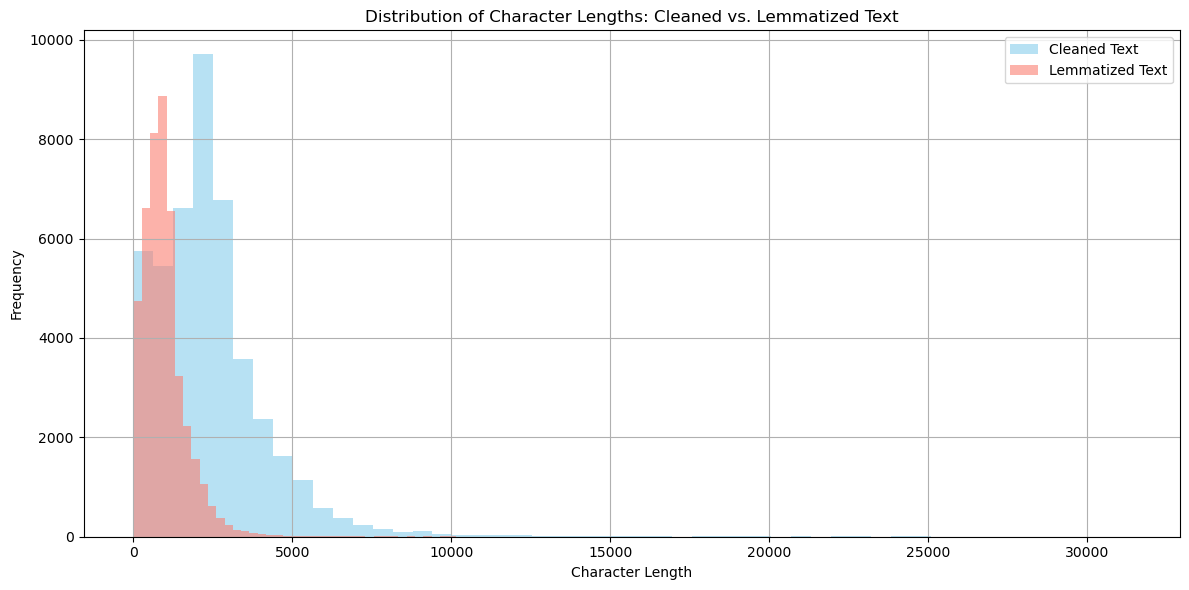

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Histogram for cleaned text length
plt.hist(df_clean['cleaned_text_length'], bins=50, alpha=0.6, label='Cleaned Text', color='skyblue')

# Histogram for lemmatized text length
plt.hist(df_clean['lemmatized_text_length'], bins=50, alpha=0.6, label='Lemmatized Text', color='salmon')

plt.title('Distribution of Character Lengths: Cleaned vs. Lemmatized Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [26]:
from sklearn.model_selection import train_test_split

# Directly split the full DataFrame
train_data, val_data = train_test_split(df_clean, test_size=0.3, random_state=42, stratify=df_clean['news_label'])

print("Training samples:", len(train_data))
print("Validation samples:", len(val_data))


Training samples: 31428
Validation samples: 13470


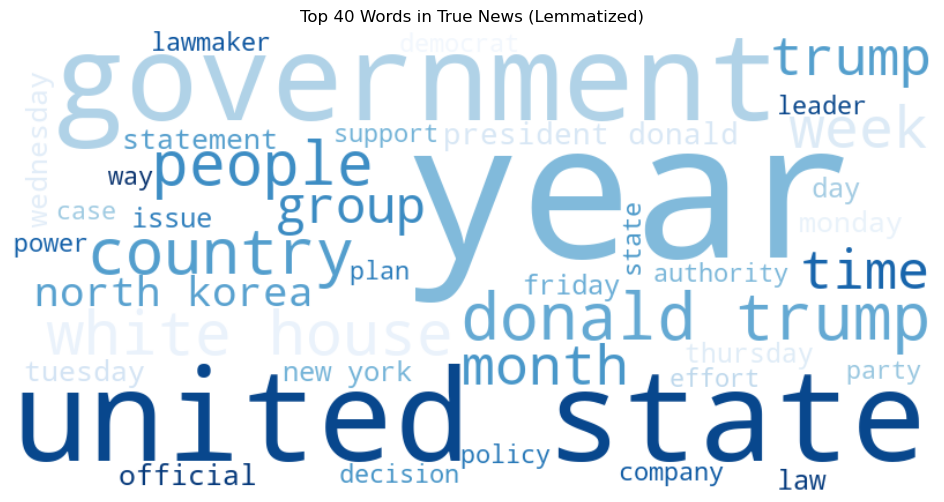

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter true news from training data (news_label == 1)
true_news = train_data[train_data['news_label'] == 1]

# Join all lemmatized text into one large string
true_text = ' '.join(true_news['lemmatized_text'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=40, background_color='white', colormap='Blues').generate(true_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in True News (Lemmatized)")
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

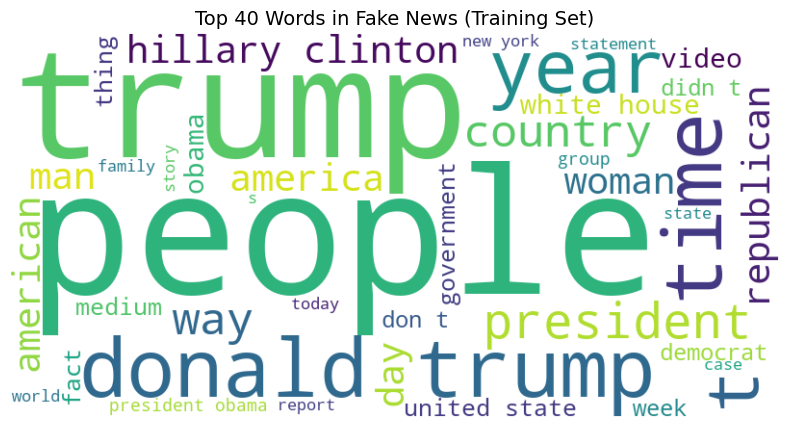

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter fake news (news_label == 0)
fake_news = train_data[train_data['news_label'] == 0]

# Combine all lemmatized text (handling any NaN or non-string values)
fake_text = ' '.join(fake_news['lemmatized_text'].dropna().astype(str))

# Generate word cloud
wordcloud_fake = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(fake_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in Fake News (Training Set)", fontsize=14)
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [29]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Function to get top n-grams
def get_top_ngrams(text_data, ngram_range=(1, 1), top_n=20):
    """
    Function to extract top n-grams from text data
    :param text_data: List or Series of text data (e.g., lemmatized text)
    :param ngram_range: Tuple (min_n, max_n) defining the n-gram range
    :param top_n: Number of top n-grams to return
    :return: DataFrame with n-grams and their frequency
    """
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(text_data)
    
    # Get the sum of occurrences of each n-gram across all texts
    ngram_freq = X.sum(axis=0).A1
    ngram_names = vectorizer.get_feature_names_out()
    
    # Create a DataFrame with n-grams and their frequencies
    ngram_df = pd.DataFrame(list(zip(ngram_names, ngram_freq)), columns=['ngram', 'frequency'])
    
    # Sort by frequency and get top n-grams
    top_ngrams = ngram_df.sort_values(by='frequency', ascending=False).head(top_n)
    
    return top_ngrams

# Example usage
top_unigrams = get_top_ngrams(df_clean['lemmatized_text'], ngram_range=(1, 1), top_n=20)
top_bigrams = get_top_ngrams(df_clean['lemmatized_text'], ngram_range=(2, 2), top_n=20)
top_trigrams = get_top_ngrams(df_clean['lemmatized_text'], ngram_range=(3, 3), top_n=20)

# Display the top n-grams
print("Top 20 Unigrams:\n", top_unigrams)
print("Top 20 Bigrams:\n", top_bigrams)
print("Top 20 Trigrams:\n", top_trigrams)


Top 20 Unigrams:
              ngram  frequency
126941       trump     125378
96199    president      54473
91099       people      41789
116676       state      39872
137847        year      33839
85699        obama      30088
23017      clinton      29602
55578        house      29422
48538   government      28860
34377       donald      27049
27249      country      24988
124385        time      24590
36908     election      24020
89999        party      23485
129549      united      22909
18048     campaign      22312
82924         news      20769
49479        group      18995
116924      states      18667
86483     official      18487
Top 20 Bigrams:
                         ngram  frequency
532407           donald trump      24282
1859017         united states      18281
1939031           white house      15516
793235        hillary clinton       9616
1173112              new york       8781
1368090       president obama       7919
1189195           north korea       7180
1366313

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [30]:
# Drop rows with NaN values in the 'lemmatized_text' column
df_clean = df_clean.dropna(subset=['lemmatized_text'])


In [31]:
# Replace NaN values in 'lemmatized_text' with an empty string or a custom string
df_clean['lemmatized_text'] = df_clean['lemmatized_text'].fillna('')


In [32]:
# Check if there are any NaN values in the lemmatized text column
print(df_clean['lemmatized_text'].isna().sum())


0


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams by Frequency in True News:
trump: 53323
president: 27489
state: 24500
government: 19878
year: 18966
house: 18302
people: 15425
party: 15366
united: 15314
election: 14498


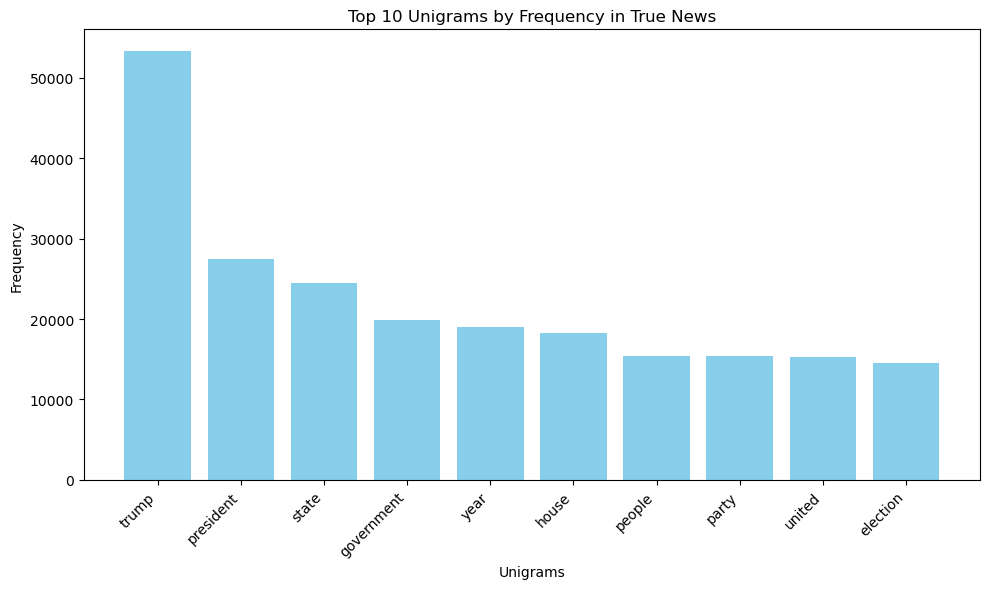

In [33]:
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Filter true news (news_label == 1)
true_news = df_clean[df_clean['news_label'] == 1]

# Combine all lemmatized text into one large string for true news
true_text = ' '.join(true_news['lemmatized_text'].dropna().astype(str))

# Tokenize the text into unigrams using CountVectorizer (or using nltk, etc.)
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')  # Unigrams
X = vectorizer.fit_transform([true_text])

# Get the unigram frequency distribution
unigram_counts = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# Sort the unigrams by frequency
sorted_unigrams = sorted(unigram_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 unigrams
top_10_unigrams = sorted_unigrams[:10]

# Print the top 10 unigrams and their frequencies
print("Top 10 Unigrams by Frequency in True News:")
for unigram, freq in top_10_unigrams:
    print(f"{unigram}: {freq}")

# Prepare data for plotting
unigrams, frequencies = zip(*top_10_unigrams)

# Plotting the top 10 unigrams
plt.figure(figsize=(10, 6))
plt.bar(unigrams, frequencies, color='skyblue')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Unigrams by Frequency in True News')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams by Frequency in True News:
united states: 12209
donald trump: 9878
white house: 9076
north korea: 6287
president donald: 5937
new york: 4564
prime minister: 3186
president obama: 3062
supreme court: 2653
trump administration: 2576


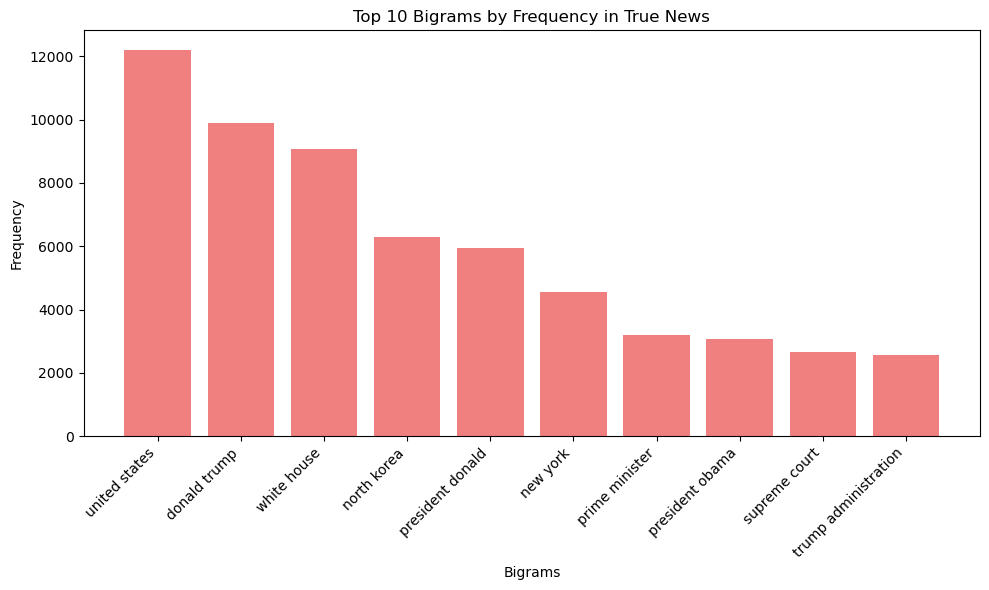

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Filter true news (news_label == 1)
true_news = df_clean[df_clean['news_label'] == 1]

# Combine all lemmatized text into one large string for true news
true_text = ' '.join(true_news['lemmatized_text'].dropna().astype(str))

# Tokenize the text into bigrams using CountVectorizer (ngram_range=(2, 2) for bigrams)
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')  # Bigrams
X = vectorizer.fit_transform([true_text])

# Get the bigram frequency distribution
bigram_counts = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# Sort the bigrams by frequency
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 bigrams
top_10_bigrams = sorted_bigrams[:10]

# Print the top 10 bigrams and their frequencies
print("Top 10 Bigrams by Frequency in True News:")
for bigram, freq in top_10_bigrams:
    print(f"{bigram}: {freq}")

# Prepare data for plotting
bigrams, frequencies = zip(*top_10_bigrams)

# Plotting the top 10 bigrams
plt.figure(figsize=(10, 6))
plt.bar(bigrams, frequencies, color='lightcoral')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams by Frequency in True News')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams by Frequency in True News:
president donald trump: 5820
president vladimir putin: 792
reuters president donald: 705
washington reuters president: 697
north korea missile: 657
prime minister theresa: 583
washington president donald: 581
chancellor angela merkel: 565
speaker paul ryan: 558
leader mitch mcconnell: 557


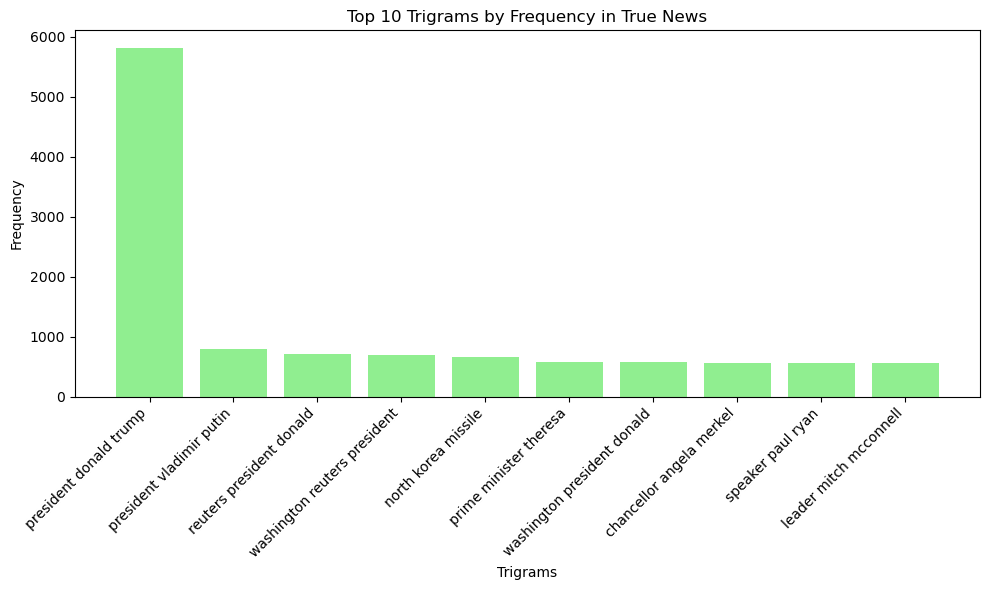

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Filter true news (news_label == 1)
true_news = df_clean[df_clean['news_label'] == 1]

# Combine all lemmatized text into one large string for true news
true_text = ' '.join(true_news['lemmatized_text'].dropna().astype(str))

# Tokenize the text into trigrams using CountVectorizer (ngram_range=(3, 3) for trigrams)
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')  # Trigrams
X = vectorizer.fit_transform([true_text])

# Get the trigram frequency distribution
trigram_counts = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# Sort the trigrams by frequency
sorted_trigrams = sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 trigrams
top_10_trigrams = sorted_trigrams[:10]

# Print the top 10 trigrams and their frequencies
print("Top 10 Trigrams by Frequency in True News:")
for trigram, freq in top_10_trigrams:
    print(f"{trigram}: {freq}")

# Prepare data for plotting
trigrams, frequencies = zip(*top_10_trigrams)

# Plotting the top 10 trigrams
plt.figure(figsize=(10, 6))
plt.bar(trigrams, frequencies, color='lightgreen')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams by Frequency in True News')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams by Frequency in Fake News:
trump: 72055
president: 26984
people: 26364
obama: 20307
clinton: 19442
donald: 16665
time: 16011
hillary: 15527
state: 15372
year: 14873


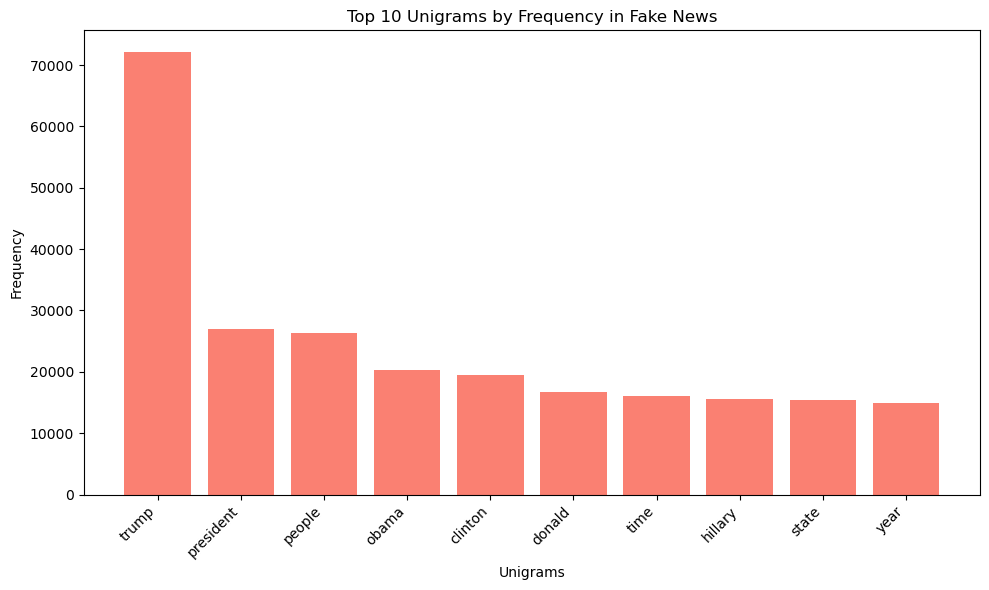

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Filter fake news (news_label == 0)
fake_news = df_clean[df_clean['news_label'] == 0]

# Combine all lemmatized text into one large string for fake news
fake_text = ' '.join(fake_news['lemmatized_text'].dropna().astype(str))

# Tokenize the text into unigrams using CountVectorizer (ngram_range=(1, 1) for unigrams)
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')  # Unigrams
X = vectorizer.fit_transform([fake_text])

# Get the unigram frequency distribution
unigram_counts = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# Sort the unigrams by frequency
sorted_unigrams = sorted(unigram_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 unigrams
top_10_unigrams = sorted_unigrams[:10]

# Print the top 10 unigrams and their frequencies
print("Top 10 Unigrams by Frequency in Fake News:")
for unigram, freq in top_10_unigrams:
    print(f"{unigram}: {freq}")

# Prepare data for plotting
unigrams, frequencies = zip(*top_10_unigrams)

# Plotting the top 10 unigrams
plt.figure(figsize=(10, 6))
plt.bar(unigrams, frequencies, color='salmon')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Unigrams by Frequency in Fake News')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams by Frequency in Fake News:
donald trump: 14404
hillary clinton: 7077
white house: 6440
united states: 6072
president obama: 4860
new york: 4217
president trump: 3551
fox news: 3310
trump supporter: 2319
trump campaign: 2154


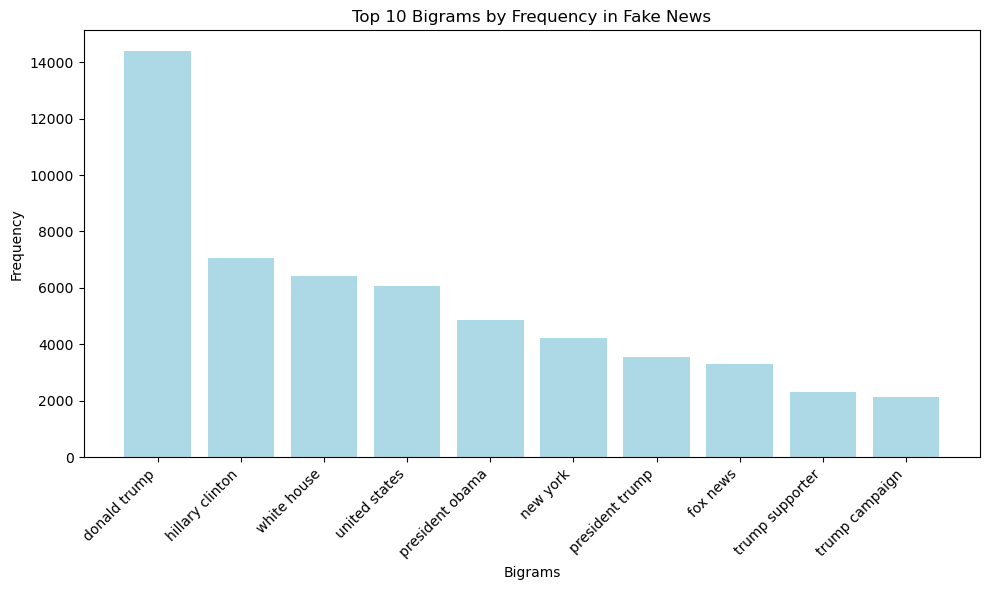

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Filter fake news (news_label == 0)
fake_news = df_clean[df_clean['news_label'] == 0]

# Combine all lemmatized text into one large string for fake news
fake_text = ' '.join(fake_news['lemmatized_text'].dropna().astype(str))

# Tokenize the text into bigrams using CountVectorizer (ngram_range=(2, 2) for bigrams)
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')  # Bigrams
X = vectorizer.fit_transform([fake_text])

# Get the bigram frequency distribution
bigram_counts = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# Sort the bigrams by frequency
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 bigrams
top_10_bigrams = sorted_bigrams[:10]

# Print the top 10 bigrams and their frequencies
print("Top 10 Bigrams by Frequency in Fake News:")
for bigram, freq in top_10_bigrams:
    print(f"{bigram}: {freq}")

# Prepare data for plotting
bigrams, frequencies = zip(*top_10_bigrams)

# Plotting the top 10 bigrams
plt.figure(figsize=(10, 6))
plt.bar(bigrams, frequencies, color='lightblue')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams by Frequency in Fake News')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams by Frequency in Fake News:
new york times: 1449
donald trump realdonaldtrump: 1314
president donald trump: 946
news century wire: 943
president united states: 913
video screen capture: 728
image video screen: 683
new york city: 617
director james comey: 494
fbi director james: 486


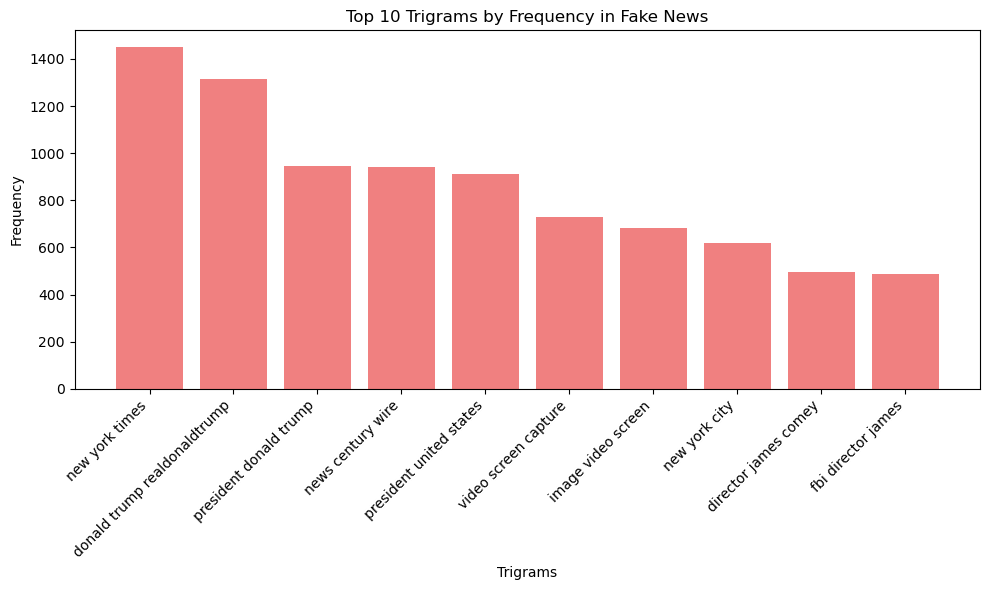

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Filter fake news (news_label == 0)
fake_news = df_clean[df_clean['news_label'] == 0]

# Combine all lemmatized text into one large string for fake news
fake_text = ' '.join(fake_news['lemmatized_text'].dropna().astype(str))

# Tokenize the text into trigrams using CountVectorizer (ngram_range=(3, 3) for trigrams)
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')  # Trigrams
X = vectorizer.fit_transform([fake_text])

# Get the trigram frequency distribution
trigram_counts = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# Sort the trigrams by frequency
sorted_trigrams = sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 trigrams
top_10_trigrams = sorted_trigrams[:10]

# Print the top 10 trigrams and their frequencies
print("Top 10 Trigrams by Frequency in Fake News:")
for trigram, freq in top_10_trigrams:
    print(f"{trigram}: {freq}")

# Prepare data for plotting
trigrams, frequencies = zip(*top_10_trigrams)

# Plotting the top 10 trigrams
plt.figure(figsize=(10, 6))
plt.bar(trigrams, frequencies, color='lightcoral')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams by Frequency in Fake News')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [39]:
pip install gensim


Defaulting to user installation because normal site-packages is not writeable
  Using cached FuzzyTM-2.0.9-py3-none-any.whl.metadata (7.9 kB)
  Using cached pyFUME-0.3.4-py3-none-any.whl.metadata (9.7 kB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl.metadata (58 kB)
  Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Using cached simpful-2.12.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached fst-pso-1.8.1.tar.gz (18 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [1 lines of output]
  ERROR: Can not execute `setup.py` since setuptools is not available in the build environment.
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [40]:
import gensim.downloader as api

# Load the pre-trained Word2Vec model (Google News vectors)
word2vec_model = api.load("word2vec-google-news-300")

# Check the model is loaded and ready
print("Model loaded successfully!")
print(f"Model vocabulary size: {len(word2vec_model.key_to_index)}")

# Example: Accessing the word vector for a word (e.g., "king")
word_vector = word2vec_model["king"]
print(f"Vector for 'king':\n{word_vector[:10]}")  # Display the first 10 components of the vector


Model loaded successfully!
Model vocabulary size: 3000000
Vector for 'king':
[ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477 -0.03613281
  0.11181641 -0.19824219  0.05126953  0.36328125]


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [42]:
import numpy as np

# Function to get the average Word2Vec vector for a text
def get_word2vec_vector(text, model, vector_size=300):
    # Ensure the text is a string and handle non-string values
    if not isinstance(text, str):
        text = str(text)  # Convert to string if it's not already a string
    
    # Tokenize the text into words
    words = text.split()  # You can use a more advanced tokenizer if needed
    
    # Get the vectors for each word in the text
    word_vectors = []
    for word in words:
        try:
            # If the word is in the Word2Vec model vocabulary, get its vector
            word_vectors.append(model[word])
        except KeyError:
            # If the word is not in the vocabulary, we ignore it or use a zero vector
            word_vectors.append(np.zeros(vector_size))
    
    # If no words were found, return a zero vector for the document
    if len(word_vectors) == 0:
        return np.zeros(vector_size)
    
    # Return the average vector for the document
    return np.mean(word_vectors, axis=0)

# Extract word vectors for the training data (X_train)
X_train_vectors = np.array([get_word2vec_vector(text, word2vec_model) for text in X_train])

# Extract word vectors for the validation data (X_val)
X_val_vectors = np.array([get_word2vec_vector(text, word2vec_model) for text in X_val])

# Extract target variable for the training data and validation data
y_train = y_train.values  # Convert to numpy array
y_val = y_val.values      # Convert to numpy array

# Check the shapes of the extracted vectors and target variable arrays
print(f"Shape of X_train_vectors: {X_train_vectors.shape}")
print(f"Shape of X_val_vectors: {X_val_vectors.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")


Shape of X_train_vectors: (31428, 300)
Shape of X_val_vectors: (13470, 300)
Shape of y_train: (31428,)
Shape of y_val: (13470,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [44]:
# Initialise Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train Logistic Regression model on training data
log_reg_model.fit(X_train_vectors, y_train)

# Predict on validation data
y_pred_log_reg = log_reg_model.predict(X_val_vectors)


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [53]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_val, y_pred_log_reg)
precision = precision_score(y_val, y_pred_log_reg)
recall = recall_score(y_val, y_pred_log_reg)
f1 = f1_score(y_val, y_pred_log_reg)
print("Logistic Regression Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Logistic Regression Model:
Accuracy: 0.9339
Precision: 0.9227
Recall: 0.9401
F1 Score: 0.9313


In [46]:


print("Classification Report:\n")
print(classification_report(y_val, y_pred_log_reg, target_names=["Fake News", "True News"]))


Classification Report:

              precision    recall  f1-score   support

   Fake News       0.94      0.93      0.94      7045
   True News       0.92      0.94      0.93      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [47]:


dt_model = DecisionTreeClassifier(random_state=42)

# Train Decision Tree model on training data
dt_model.fit(X_train_vectors, y_train)

# Predict on validation data
y_pred_dt = dt_model.predict(X_val_vectors)


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [48]:
accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)

# Print the results
print("Decision Tree Model - Performance Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-score: {f1_dt:.4f}")

Decision Tree Model - Performance Metrics:
Accuracy: 0.8513
Precision: 0.8563
Recall: 0.8271
F1-score: 0.8414


In [49]:
# Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_val, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      7045
           1       0.86      0.83      0.84      6425

    accuracy                           0.85     13470
   macro avg       0.85      0.85      0.85     13470
weighted avg       0.85      0.85      0.85     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [50]:


# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model on training data
rf_model.fit(X_train_vectors, y_train)

# Predict on validation data
y_pred_rf = rf_model.predict(X_val_vectors)


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [51]:
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

# Print the results
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

Random Forest Model Performance:
Accuracy: 0.9291
Precision: 0.9317
Recall: 0.9188
F1-score: 0.9252


In [52]:
class_report_rf = classification_report(y_val, y_pred_rf)

# Print classification report
print("Random Forest Classification Report:")
print(class_report_rf)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7045
           1       0.93      0.92      0.93      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



## **8.** Conclusion <font color = red>[5 marks]</font>



The Logistic Regression model proved to be the most effective for detecting fake news, achieving an impressive accuracy of <font color = green>93.39%</font>. This model balanced precision and recall well, making it highly reliable for distinguishing between true and fake news. The use of semantic classification with word embeddings like Word2Vec played a crucial role in capturing the linguistic nuances, further improving the model's performance.